In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/fanyang/Documents/yelp_project/12_24/last_2_years_restaurant_reviews_AZ.csv')

In [3]:
df.head(3)

,business_id,Unnamed: 0,name,categories,starts_business,cool,date,funny,review_id,stars,text,useful,user_id
0,-01XupAWZEXbdNbxNg5mEg,8836,18 Degrees Neighborhood Grill,"Nightlife, Bars, Restaurants, American (Tradit...",3.0,0,2017-06-26,0,VpdB20xoSH514ks0MkNqGQ,1,False advertisement! Website says open until 1...,0,GbYhdXKQGYGp6D2_S3Oyfw
1,-01XupAWZEXbdNbxNg5mEg,8836,18 Degrees Neighborhood Grill,"Nightlife, Bars, Restaurants, American (Tradit...",3.0,1,2017-01-29,0,Xvdqblf2f7nx2h4B2UuD-g,2,Came in so my kiddo could skate and I could ju...,0,CU_RU1o3sKSwymRotn3DUg
2,-01XupAWZEXbdNbxNg5mEg,8836,18 Degrees Neighborhood Grill,"Nightlife, Bars, Restaurants, American (Tradit...",3.0,0,2016-09-03,1,Z7ufB8dFZ_9VjkcntOEsig,1,Horrible! Had the happy hour nachos. The che...,2,-XoCb6sUMa7NoFayUW0FlA


In [4]:
df.shape

(462965, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462965 entries, 0 to 462964
Data columns (total 13 columns):
business_id        462965 non-null object
Unnamed: 0         462965 non-null int64
name               462965 non-null object
categories         462965 non-null object
starts_business    462965 non-null float64
cool               462965 non-null int64
date               462965 non-null object
funny              462965 non-null int64
review_id          462965 non-null object
stars              462965 non-null int64
text               462965 non-null object
useful             462965 non-null int64
user_id            462965 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 45.9+ MB


#### prepare review 'text' for NLP extraction

In [15]:
documents = df['text']

In [16]:
# get non Null index
indx = pd.notnull(documents)

In [17]:
type(indx)

pandas.core.series.Series

In [18]:
indx[:10]

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: text, dtype: bool

In [19]:
# select review that is not null
documents = documents[indx].values

In [20]:
documents[:5]

array(['False advertisement! Website says open until 11pm and the truth is...they are only open until the ice is open.',
       "Came in so my kiddo could skate and I could just watch front the comfort of the bar.  Service was non existent.  The waitresses walked past me about 10 times.... never even making eye contact.  I had to go to the bar to get a drink twice.  The bartender was speedy and friendly!  It's annoying and frustrating to be ignored.  Tips are earned.",
       'Horrible!  Had the happy hour nachos.  The cheese tasted like old plastic and smelled like vomit!  Absolutely disgusting!    I would never eat here again!',
       'Been here a few times and most times decent to good service.\n\nLast time I was there I had the best burger I have had in a long time. Great flavor!\n\nGood bar atmosphere and really nice to walk hockey or LaCrosse at the same time.',
       "This place sucks. The waitress is really rude and wont give you water unless you eat food. My friend and i wen

In [21]:
type(documents)

numpy.ndarray

#### define labels for classification

In [24]:
var_list = [u'starts_business',u'stars',u'cool',u'funny',u'useful']
df[var_list].describe()

,starts_business,stars,cool,funny,useful
count,462965.000000,462965.000000,462965.000000,462965.000000,462965.000000
mean,3.809574,3.787755,0.471999,0.326504,0.825976
std,0.625396,1.472953,2.857376,2.914266,3.478056
min,1.000000,1.000000,-1.000000,0.000000,-1.000000
25%,3.500000,3.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,0.000000,0.000000,1.000000
max,5.000000,5.000000,220.000000,991.000000,822.000000


##### both 'starts_business' and 'stars' have similar mean and similar distribution
#### take review is positive when stars given by reviewer above 4.0

In [25]:
df['positive_review'] = (df['stars']>4)

In [26]:
df['positive_review'].value_counts()

False    238299
True     224666
Name: positive_review, dtype: int64

In [27]:
# look the distribution
df['positive_review'].value_counts(normalize=True)

False    0.514724
True     0.485276
Name: positive_review, dtype: float64

In [28]:
df['positive_review'][:5]

0    False
1    False
2    False
3    False
4    False
Name: positive_review, dtype: bool

In [30]:
target = df['positive_review'].values

In [31]:
target[:5]

array([False, False, False, False, False])

In [32]:
# only select 'stars' that have review

target = target[indx]

In [33]:
target[:5]

array([False, False, False, False, False])

In [36]:
df[df['positive_review']==True]['starts_business'].mean()

4.016796043905175

In [37]:
# review and target label should have the same size
documents.size,target.size

(462965, 462965)

#### review text vectorization

In [38]:
# split train and test dataset
from sklearn.cross_validation import train_test_split

documents_train,documents_test,target_train,target_test = train_test_split(documents,target,test_size=0.3, random_state=0)

/usr/local/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
# single gram
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',max_features=5000,min_df=1)

In [40]:
# model training
x_train = vectorizer.fit_transform(documents_train).toarray()

In [41]:
# get tfidf
features_name = vectorizer.get_feature_names()

In [42]:
# let model to transform test dataset
x_test = vectorizer.transform(documents_test).toarray()

In [43]:
# bigram

vectorizer2 = TfidfVectorizer(stop_words='english',max_features=5000,min_df=1,ngram_range=(1, 2))
x_train2 = vectorizer2.fit_transform(documents_train).toarray()
features_name2 = vectorizer2.get_feature_names()
x_test2 = vectorizer2.transform(documents_test).toarray()

#### search for similar review text

In [45]:
# generate function that return top and bottom values
import numpy as np

def get_top_values(lst, n, labels):

    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  

def get_bottom_values(lst, n, labels):

    return [labels[i] for i in np.argsort(lst)[:n]]

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
# Draw an arbitrary review from test (unseen in training) documents
sample_review = [documents_test[10]]
sample_review

['Went here for my 50th birthday and had a very enjoyable night.  I had the Smoked Prime Rib w/Mac and Cheese and Potato Salad.  It had a wonderful flavor and was tender as well.  Perfectly cooked.\n\nThe place was just starting to get busy, but it in no way took away from the great service I had.  The place has a fully stocked bar, so I had to have a spicy Bloody Mary.  \n\nI started with the Cajun Shrimp appetizer and the flavor was spot on.  The shrimp were juicy and delicious and it comes with like garlic bread sticks to sop up the wonderful juices in the bowl.  \n\nTo top the night off, I was presented with a Brownie Sundae with candle for my birthday!  (Totally unexpected and delicious)  \n\nOnly regret was not going back and getting some BBQ to take home with me.']

In [48]:
# Transform the drawn review(s) to vector(s)
vector_review = vectorizer.transform(sample_review).toarray()

In [49]:
vector_review2 = vectorizer2.transform(sample_review).toarray()

In [50]:
# Calculate the similarity score between vector and training vectors
similarity_scores = cosine_similarity(vector_review, x_test[:100])

In [51]:
similarity_scores2 = cosine_similarity(vector_review2,x_test2[:100])

In [52]:
similarity_scores[0]

array([0.        , 0.01972214, 0.09092194, 0.03215549, 0.02235551,
       0.03632777, 0.01314705, 0.03735454, 0.02695115, 0.04589935,
       1.        , 0.03003093, 0.00420568, 0.08652298, 0.        ,
       0.03426224, 0.02927336, 0.01967489, 0.01573825, 0.10148243,
       0.        , 0.05469829, 0.01941662, 0.03149428, 0.04907891,
       0.02049893, 0.02166269, 0.0628093 , 0.03364375, 0.07429393,
       0.01502597, 0.04771861, 0.        , 0.01862386, 0.0599105 ,
       0.02348196, 0.01292796, 0.01120118, 0.05995684, 0.00692731,
       0.03460658, 0.02043189, 0.01052673, 0.        , 0.051248  ,
       0.04363844, 0.01015876, 0.01165514, 0.03039155, 0.01018661,
       0.05887872, 0.10859224, 0.02296391, 0.00776329, 0.00784552,
       0.05847493, 0.01581053, 0.03195255, 0.02211209, 0.05098562,
       0.02734876, 0.07314433, 0.03190248, 0.04927461, 0.08788393,
       0.06704977, 0.06583373, 0.05030685, 0.02353605, 0.0108093 ,
       0.01625968, 0.06871412, 0.        , 0.00994552, 0.03190

In [53]:
# identify top 5 similar review
n = 5
top_similar_review = get_top_values(similarity_scores[0], n, documents_test[:100])

In [54]:
n = 5
top_similar_review2 = get_top_values(similarity_scores2[0],n,documents_test[:100])

In [55]:
print('Our search query:')
print(sample_review) 

Our search query:
['Went here for my 50th birthday and had a very enjoyable night.  I had the Smoked Prime Rib w/Mac and Cheese and Potato Salad.  It had a wonderful flavor and was tender as well.  Perfectly cooked.\n\nThe place was just starting to get busy, but it in no way took away from the great service I had.  The place has a fully stocked bar, so I had to have a spicy Bloody Mary.  \n\nI started with the Cajun Shrimp appetizer and the flavor was spot on.  The shrimp were juicy and delicious and it comes with like garlic bread sticks to sop up the wonderful juices in the bowl.  \n\nTo top the night off, I was presented with a Brownie Sundae with candle for my birthday!  (Totally unexpected and delicious)  \n\nOnly regret was not going back and getting some BBQ to take home with me.']


In [56]:
print('Most %s similar reviews:' % n)
for i in range(len(top_similar_review)):
    print ('top %s review:' % i)
    print (top_similar_review[i])

Most 5 similar reviews:
top 0 review:
Went here for my 50th birthday and had a very enjoyable night.  I had the Smoked Prime Rib w/Mac and Cheese and Potato Salad.  It had a wonderful flavor and was tender as well.  Perfectly cooked.

The place was just starting to get busy, but it in no way took away from the great service I had.  The place has a fully stocked bar, so I had to have a spicy Bloody Mary.  

I started with the Cajun Shrimp appetizer and the flavor was spot on.  The shrimp were juicy and delicious and it comes with like garlic bread sticks to sop up the wonderful juices in the bowl.  

To top the night off, I was presented with a Brownie Sundae with candle for my birthday!  (Totally unexpected and delicious)  

Only regret was not going back and getting some BBQ to take home with me.
top 1 review:
Yesterday my husband and I were celebrating our wedding anniversary, so we decided on Firebirds.  Hands down Firebirds Wood Fired Grill  in the west valley! Everything on the me

In [57]:
print('Most %s similar reviews:' % n)
for i in range(len(top_similar_review2)):
    print ('top %s review:' % i)
    print (top_similar_review2[i])

Most 5 similar reviews:
top 0 review:
Went here for my 50th birthday and had a very enjoyable night.  I had the Smoked Prime Rib w/Mac and Cheese and Potato Salad.  It had a wonderful flavor and was tender as well.  Perfectly cooked.

The place was just starting to get busy, but it in no way took away from the great service I had.  The place has a fully stocked bar, so I had to have a spicy Bloody Mary.  

I started with the Cajun Shrimp appetizer and the flavor was spot on.  The shrimp were juicy and delicious and it comes with like garlic bread sticks to sop up the wonderful juices in the bowl.  

To top the night off, I was presented with a Brownie Sundae with candle for my birthday!  (Totally unexpected and delicious)  

Only regret was not going back and getting some BBQ to take home with me.
top 1 review:
Any stars given is solely for our server who did everything he could to give us great service. But his great service unfortunately doesn't make up for the terrible food or the f

##### single gram and bigram produce very similar review. 4 of the 5 review text are the same between the two method.

### Classifying positive/negative review

In [58]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,roc_auc_score

In [59]:
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [61]:
# helper function to train models
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### naive-bayes classifier

In [44]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()

clf_nb.fit(x_train, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

              train      test
metrics                      
AUC        0.890262  0.890128
Accuracy   0.812451  0.812182
Precision  0.776062  0.775958
Recall     0.862845  0.860660
f1-score   0.817156  0.816117


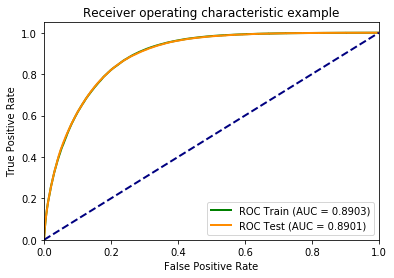

In [62]:
train_test_model(clf_nb, x_train, target_train, x_test, target_test)

#### logistic regression classifier

In [63]:
from sklearn.linear_model import LogisticRegression

clf_lrc = LogisticRegression()

clf_lrc.fit(x_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.922517  0.918130
Accuracy   0.846588  0.840932
Precision  0.826903  0.822046
Recall     0.865278  0.857062
f1-score   0.845655  0.839189


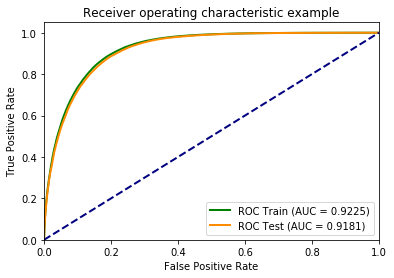

In [64]:
train_test_model(clf_lrc, x_train, target_train, x_test, target_test)

In [65]:
# find key words that contribute to positive review
n = 20
get_top_values(clf_lrc.coef_[0], n, features_name)

['amazing',
 'best',
 'phenomenal',
 'thank',
 'awesome',
 'delicious',
 'perfection',
 'incredible',
 'great',
 'fantastic',
 'perfectly',
 'perfect',
 'love',
 'favorite',
 'highly',
 'excellent',
 'outstanding',
 'die',
 'regret',
 'wow']

In [66]:
# find key words that contribute to negative review
n = 20
get_bottom_values(clf_lrc.coef_[0], n, features_name)

['worst',
 'rude',
 'bland',
 'disappointing',
 'horrible',
 'awful',
 'ok',
 'terrible',
 'mediocre',
 'okay',
 'lacked',
 'meh',
 'lacking',
 'slow',
 'poor',
 'average',
 'overpriced',
 'dry',
 'flavorless',
 'tasteless']

#### random forest classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier(max_depth=20, n_estimators=10, min_samples_leaf=100)

clf_rfc.fit(x_train, target_train)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.850422  0.850216
Accuracy   0.772540  0.772676
Precision  0.748823  0.748043
Recall     0.800058  0.800059
f1-score   0.773593  0.773178


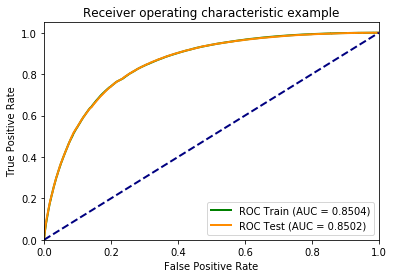

In [68]:
train_test_model(clf_rfc, x_train, target_train, x_test, target_test)

In [69]:
# find key words that contribute to positive review
n = 20
get_top_values(clf_rfc.feature_importances_, n, features_name)

['amazing',
 'delicious',
 'best',
 'asked',
 'ordered',
 'ok',
 'friendly',
 'awesome',
 'minutes',
 'said',
 'pretty',
 'told',
 'terrible',
 'order',
 'love',
 'excellent',
 'horrible',
 'don',
 'great',
 'place']

#### cross validation models

In [70]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
def get_scores(clf,X,y,num_folds=5):
    scoring = {'accuracy': make_scorer(accuracy_score),
               'prec': 'precision',
                'roc_auc': make_scorer(roc_auc_score),
                'recall': make_scorer(recall_score),
                'f1': make_scorer(f1_score)}
    cv_results = cross_validate(clf, X, y, scoring=scoring,cv=num_folds,return_train_score=False)
    return cv_results

#### cross validation for naive bayes classifier

In [71]:
cv_metrics_nb = get_scores(clf_nb,x_train,target_train,num_folds=5)

In [72]:
cv_metrics_nb

{'fit_time': array([51.15328002, 49.7785399 , 46.82202077, 48.91970301, 51.20480084]),
 'score_time': array([4.93870091, 4.88113093, 5.152215  , 5.11455607, 5.09697008]),
 'test_accuracy': array([0.80844236, 0.81323768, 0.80928797, 0.81117025, 0.81129077]),
 'test_prec': array([0.77140986, 0.77765677, 0.77317408, 0.77414943, 0.77650101]),
 'test_roc_auc': array([0.80989267, 0.81459068, 0.81068366, 0.81261074, 0.8126054 ]),
 'test_recall': array([0.86065053, 0.86191671, 0.85950256, 0.86299673, 0.85861313]),
 'test_f1': array([0.81359037, 0.81762162, 0.81405599, 0.81616222, 0.81549532])}

#### cross validation for logistic regression classifier 

In [73]:
cv_metrics_lrc = get_scores(clf_lrc,x_train,target_train,num_folds=5)

In [74]:
cv_metrics_lrc

{'fit_time': array([46.3230741 , 42.45321107, 42.11732984, 41.64488411, 44.50256991]),
 'score_time': array([3.61982989, 3.48674297, 3.59239602, 3.70073676, 3.565485  ]),
 'test_accuracy': array([0.83775611, 0.83912675, 0.83798503, 0.84159531, 0.84074428]),
 'test_prec': array([0.81863222, 0.81958106, 0.81907775, 0.82126848, 0.82415663]),
 'test_roc_auc': array([0.83824916, 0.83963922, 0.83846833, 0.84214336, 0.8411242 ]),
 'test_recall': array([0.85550473, 0.85756488, 0.85537308, 0.86131317, 0.85442013]),
 'test_f1': array([0.83666242, 0.83814284, 0.83683205, 0.8408143 , 0.83901557])}

#### cross validation for random forest classifier 

In [75]:
cv_metrics_rfc = get_scores(clf_rfc,x_train,target_train,num_folds=5)

In [76]:
cv_metrics_rfc

{'fit_time': array([137.24497676, 138.23608589, 134.54665589, 135.42319584,
        139.16078734]),
 'score_time': array([ 8.88594508,  8.73103309,  9.271034  ,  8.45291424, 10.28512692]),
 'test_accuracy': array([0.76420945, 0.77239836, 0.76047211, 0.76749209, 0.76972568]),
 'test_prec': array([0.73800358, 0.74724365, 0.7423598 , 0.74255816, 0.74514333]),
 'test_roc_auc': array([0.7651414 , 0.77324959, 0.76091054, 0.76833842, 0.77054659]),
 'test_recall': array([0.79775745, 0.80302405, 0.77624599, 0.79794162, 0.79927575]),
 'test_f1': array([0.76671806, 0.77413033, 0.75892483, 0.76925433, 0.77126086])}

#### grid search for logistic regression classifier 

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()

param_grid = {'penalty':['l1','l2'],
               'C':[0.5,1,5,10],
               'solver':['liblinear']}

acc_scorer = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, target_train)

clf = grid_obj.best_estimator_

clf.fit(x_train, target_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.922602  0.918306
Accuracy   0.846813  0.841025
Precision  0.826215  0.820963
Recall     0.866968  0.859069
f1-score   0.846101  0.839584


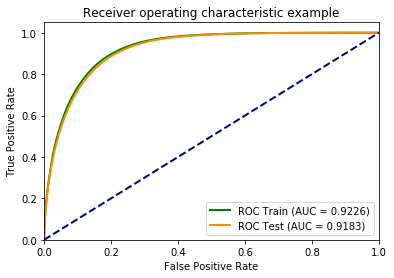

In [78]:
train_test_model(clf, x_train, target_train, x_test, target_test)

#### cross validation for naive bayes classifier

In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = MultinomialNB()

param_grid = {'alpha':[0.5,1,2]}

acc_scorer = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, target_train)

clf = grid_obj.best_estimator_

clf.fit(x_train, target_train)

MultinomialNB(alpha=2, class_prior=None, fit_prior=True)

              train      test
metrics                      
AUC        0.890373  0.890289
Accuracy   0.812658  0.812283
Precision  0.775832  0.775697
Recall     0.863906  0.861478
f1-score   0.817504  0.816340


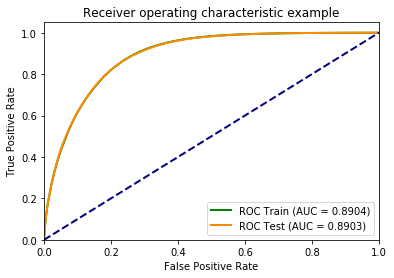

In [80]:
train_test_model(clf, x_train, target_train, x_test, target_test)